In [58]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier

In [6]:
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 

In [7]:
df = polish_companies_bankruptcy.data.original

In [8]:
#rename column
df = df.rename(columns= {'class' : 'bankrupt'})

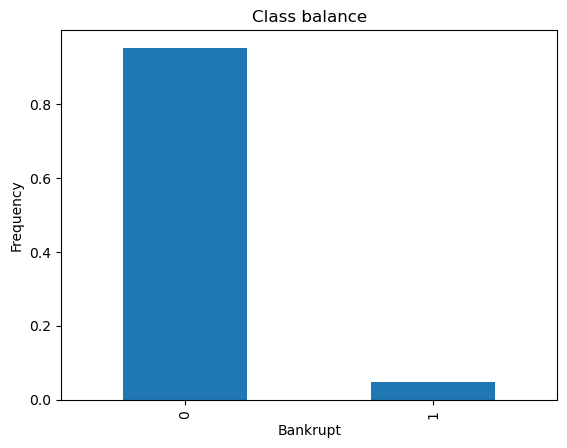

In [9]:
df['bankrupt'].value_counts(normalize=True).plot(kind ='bar')
plt.xlabel('Bankrupt')
plt.ylabel('Frequency')
plt.title('Class balance')
plt.show()

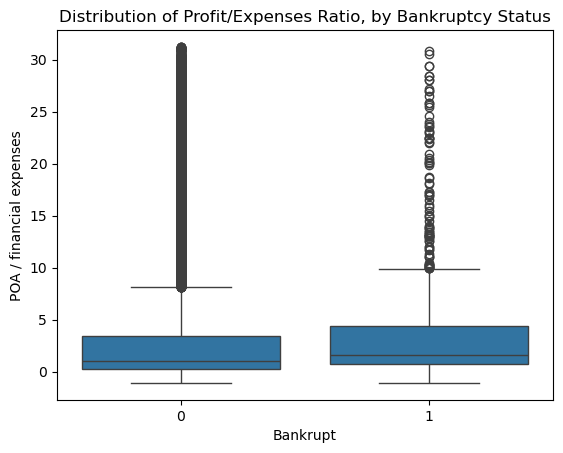

In [11]:
# Create clipped boxplot
low, high = df['A27'].quantile([0.1, 0.9])
mask = df['A27'].between(low, high)
sns.boxplot(y = 'A27' , x = 'bankrupt' , data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status")
plt.show()

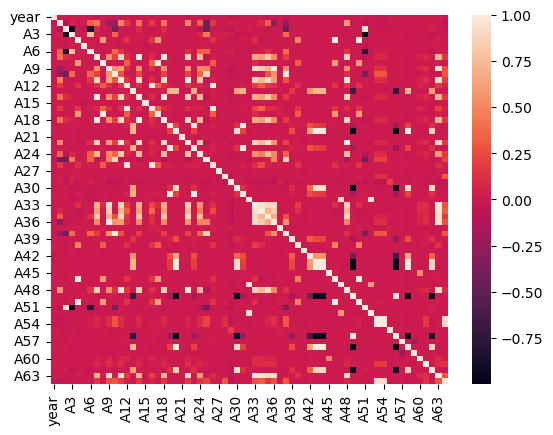

In [59]:
correlation = df.drop(columns ='bankrupt').corr()
sns.heatmap(correlation);

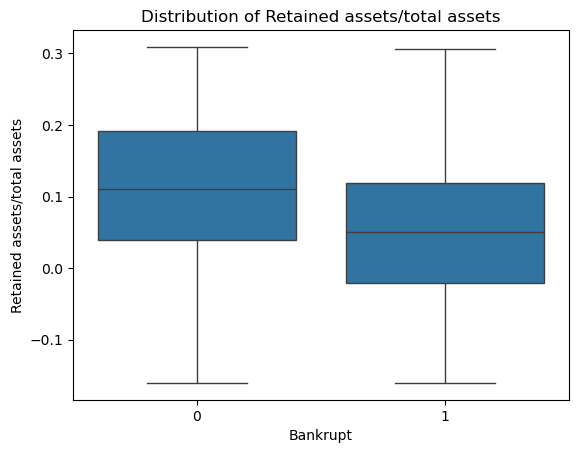

In [14]:
low, high = df['A6'].quantile([0.1, 0.9])
mask = df['A26'].between(low, high)
sns.boxplot(y = 'A26' , x = 'bankrupt' , data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("Retained assets/total assets")
plt.title("Distribution of Retained assets/total assets")
plt.show()

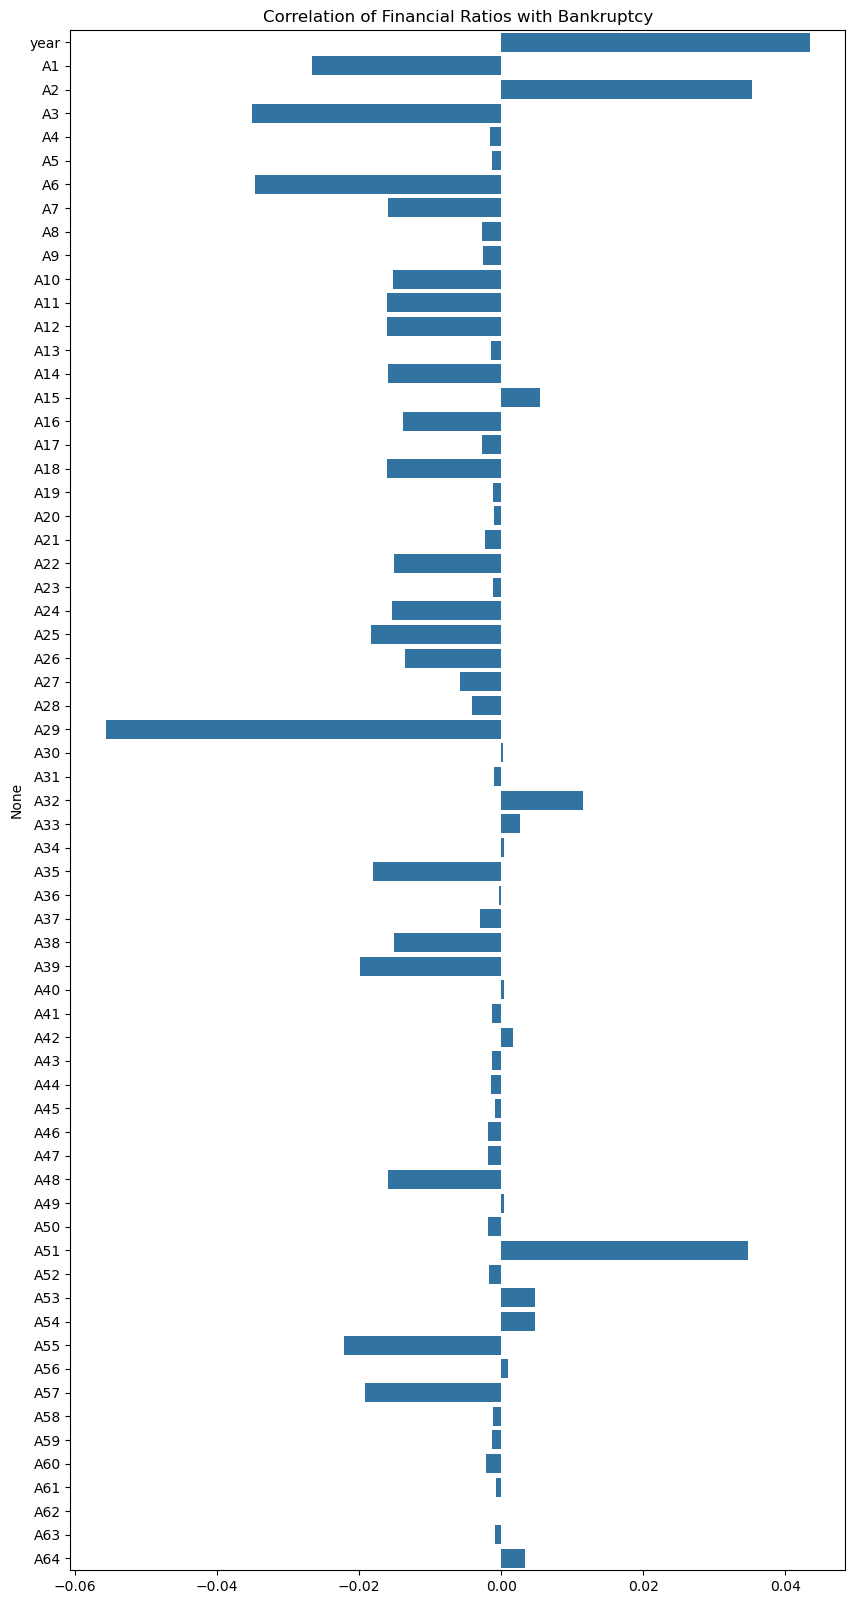

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()['bankrupt'].drop('bankrupt')
plt.figure(figsize=(10, 20))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title("Correlation of Financial Ratios with Bankruptcy")
plt.show()


In [16]:
#Spliting 
X = df.drop(columns = 'bankrupt') #features
y = df['bankrupt']#target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
#Resample over

RandomSampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = RandomSampler.fit_resample(X_train, y_train)

In [22]:
X_train_over

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,1,-0.057539,0.442520,0.223210,1.57370,23.3010,0.161160,-0.055615,1.25980,0.94527,...,8934.000,-0.057899,-0.103210,1.05790,0.095908,11.8460,3.9378,101.9800,3.5792,3.59140
1,2,-0.128080,0.853700,-0.025713,0.96909,-39.4380,-0.031407,-0.128080,0.17137,3.02940,...,-1148.500,0.168690,-0.875470,0.85164,0.000000,14.7300,5.2979,100.2300,3.6416,15.62900
2,3,-0.104010,0.861070,0.059173,1.06870,1.8093,0.000000,-0.104010,0.16134,2.28140,...,27.807,0.196490,-0.748660,0.80469,0.000000,45.6580,2.6453,137.7600,2.6495,28.60500
3,1,0.175230,0.764060,0.071079,1.09300,-26.2280,0.175230,0.212090,0.25730,1.05880,...,679.300,0.055543,0.891340,0.94446,0.000000,10.2220,3.4837,136.7400,2.6693,12.37100
4,2,0.097003,0.697680,-0.129770,0.63575,-92.9040,0.116770,0.097003,0.42044,1.06030,...,-3695.500,0.056866,0.330690,0.94313,1.163900,7.8500,30.8920,100.2700,3.6402,1.67660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66143,1,-0.009092,0.880420,0.321980,1.55050,-8.5706,0.000000,-0.002334,0.13569,3.67500,...,2873.000,0.000183,-0.076107,0.99287,2.296400,9.1038,7.7085,58.0910,6.2832,39.44100
66144,3,-0.054392,0.673370,-0.146560,0.77395,-39.5140,0.000000,-0.056575,0.48474,4.75760,...,-656.000,0.053722,-0.166640,0.93426,0.051773,12.7440,47.0170,49.7410,7.3380,9.55360
66145,3,0.005271,0.502380,-0.259600,0.30124,-197.0400,-0.410140,0.005271,0.99053,0.65435,...,-3273.000,0.067636,0.010593,0.94242,0.240360,35.8000,7.3203,207.2300,1.7613,0.73687
66146,4,0.207510,0.064761,0.840870,13.98400,47.5740,-0.244630,0.227560,14.44100,6.56390,...,277.730,0.035517,0.221880,0.96551,0.000000,NaN,12.1040,3.6012,101.3600,69.55400


In [ ]:
#Resample Under

RandomSampler = RandomUnderSampler(random_state = 42)
X_train_under, y_train_under = RandomSampler.fit_resample(X_train, y_train)

In [25]:
X_train_under

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
18536,3,-0.196780,0.725500,0.181880,3.0821,25.056,0.000000,-0.238160,0.37837,0.65133,...,4016.60,-0.330730,-0.716850,-0.42584,2.045500,5.1974,6.0054,48.952,7.4563,0.8913
42811,5,0.341250,0.110950,0.596120,6.7003,30.043,0.000000,0.420400,8.01330,1.28400,...,6654.70,0.331860,0.383830,0.67452,0.000000,2.4704,12.9360,29.729,12.2780,4.2898
30364,4,0.011582,0.824950,0.093030,1.1902,-24.185,0.000000,0.011582,0.21219,1.69320,...,1161.30,0.018158,0.066162,0.99328,1.674900,8.9392,4.4818,105.440,3.4618,4.0523
9978,2,0.547970,0.077456,0.668220,9.7478,464.280,0.000000,0.678620,11.91000,1.34210,...,796.30,0.597590,0.593980,0.50191,0.000000,NaN,11.0110,20.775,17.5690,5.2551
32936,4,-0.022274,0.657270,0.291070,1.7282,17.059,0.000000,-0.022274,0.52144,1.32110,...,262.05,-0.803580,-0.064990,1.00940,0.000000,7.4160,5.4275,110.440,3.3050,4.2729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43021,5,-0.198460,0.906480,0.016908,1.0208,-118.040,0.000113,-0.201490,0.10305,1.46650,...,145.00,-0.011211,-2.124500,1.00860,0.497750,2.7955,5.3955,202.740,1.8003,8.7098
43323,5,0.410640,0.579580,0.331130,2.1120,48.678,-0.575170,0.383910,0.72539,1.83920,...,2403.00,0.211660,0.976730,0.78845,0.000000,13.1890,4.2011,59.097,6.1763,4.9562
27480,3,-0.026362,0.469130,0.197570,2.3151,17.557,-0.026362,-0.030840,0.98456,1.00720,...,64417.00,0.007159,-0.057074,0.99284,0.690410,5.2227,4.4094,66.143,5.5184,1.2712
37194,4,0.007802,0.075943,0.924060,13.1680,160.600,0.661700,0.022123,12.16800,2.13710,...,245.18,0.030774,0.008443,0.95913,0.000000,NaN,19.6750,12.971,28.1400,NaN


In [35]:
#Baseline

baseline= y_train.value_counts(normalize= True).max()

In [60]:
baseline

0.9524824328994356

In [41]:
#Model

model_ori = make_pipeline(SimpleImputer(strategy= 'median'), DecisionTreeClassifier(random_state=42))
model_ori.fit(X_train, y_train)

model_over = make_pipeline(SimpleImputer(strategy= 'median'), DecisionTreeClassifier(random_state=42))
model_over.fit(X_train_over, y_train_over)

model_under = make_pipeline(SimpleImputer(strategy= 'median'), DecisionTreeClassifier(random_state=42))
model_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [48]:
#checking the accuracy score
for m in [model_ori, model_over, model_under]:
    training_score = m.score(X_train, y_train)
    test_score = m.score(X_test, y_test)
    print("Training Accuracy:", round(training_score, 4))
    print("Test Accuracy:", round(test_score, 4))

   
    

Training Accuracy: 1.0
Test Accuracy: 0.9506
Training Accuracy: 0.8074
Test Accuracy: 0.7842
Training Accuracy: 0.8074
Test Accuracy: 0.7842


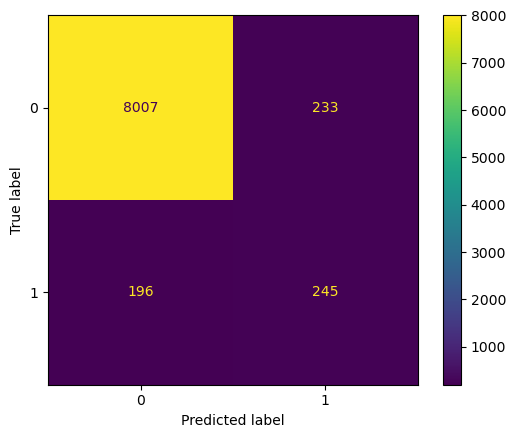

In [52]:
#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_ori, X_test, y_test);

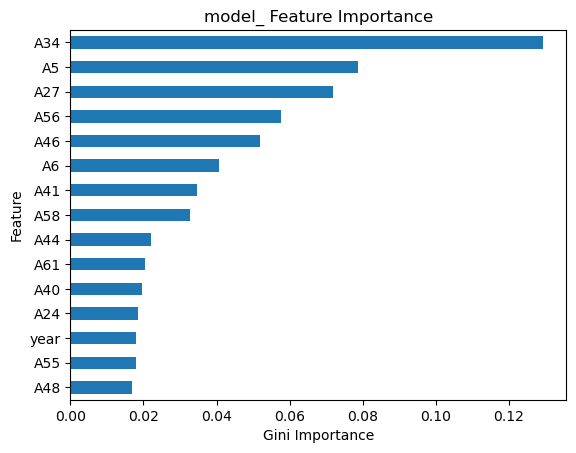

In [56]:
# Get importances
importances = model_ori.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index= X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_ Feature Importance");

In [61]:
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state= 42))

In [76]:
#cross validation score 

cross_validation = cross_val_score(clf, X_train, y_train, cv=5 , n_jobs= -1)
cross_validation



array([0.96789057, 0.96601872, 0.96328294, 0.96688265, 0.96586982])

In [77]:
#dictionary with the range of hyperparameters

param = {'simpleimputer__strategy': ['mean', 'median'], 'randomforestclassifier__n_estimators': range(25, 100, 25), 'randomforestclassifier__max_depth': range(10,50,10)}


In [78]:
model = GridSearchCV( clf, param_grid = param, cv=5 , n_jobs=-1, verbose =1)

In [79]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [91]:
cv_result= pd.DataFrame(model.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.353220,2.228966,0.082781,0.010980,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.967027,0.966739,0.963571,0.967747,0.965870,0.966191,0.001441,10
1,18.067521,0.663721,0.075387,0.004869,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.960115,0.959683,0.957955,0.960547,0.957085,0.959077,0.001329,22
2,33.373593,0.699745,0.124446,0.011193,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.966307,0.966595,0.962995,0.966019,0.965438,0.965471,0.001296,12
3,34.415995,0.660317,0.120677,0.004460,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.959827,0.957379,0.959107,0.958963,0.957949,0.958645,0.000872,23
4,50.329657,0.314456,0.169266,0.007676,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.965875,0.966739,0.963139,0.965875,0.966590,0.965643,0.001302,11
5,50.924054,0.421447,0.166758,0.009010,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.959827,0.957523,0.958963,0.958963,0.956941,0.958444,0.001054,24
6,24.888227,0.882297,0.098936,0.002475,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.968179,0.967891,0.964579,0.968323,0.967022,0.967198,0.001385,2
7,25.869946,0.217224,0.098138,0.001739,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.964147,0.960547,0.961843,0.964003,0.960685,0.962245,0.001561,14
8,49.684772,0.921403,0.163476,0.002692,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.968754,0.968035,0.964579,0.967891,0.967022,0.967256,0.001448,1
9,50.870848,1.192421,0.173913,0.007181,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.963859,0.961267,0.960979,0.962563,0.961262,0.961986,0.001086,18


In [94]:
#best params

model.best_params_

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

In [96]:
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, n_estimators=50,
                                        random_state=42))])

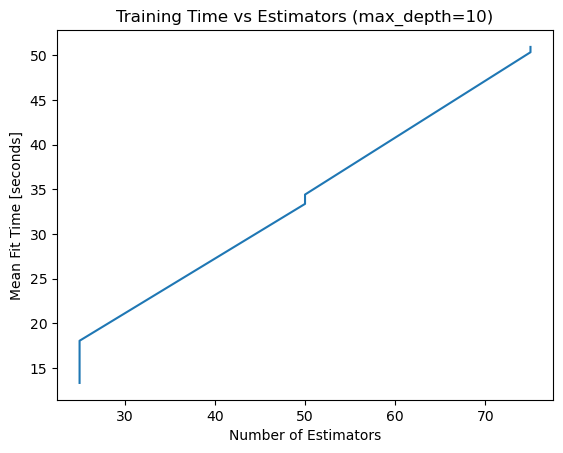

In [100]:
# Create mask
mask= cv_result['param_randomforestclassifier__max_depth'] == 10
# Plot fit time vs n_estimators
plt.plot(cv_result[mask]['param_randomforestclassifier__n_estimators'], cv_result[mask]['mean_fit_time'])
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

In [82]:
#Accuracy score
Training_score= model.score(X_train, y_train)
Test_score= model.score(X_test, y_test)

print(Training_score)
print(Test_score)_

0.9959106093767999
0.9652113811772838


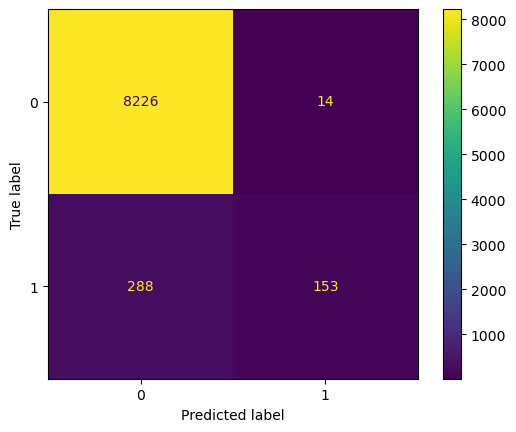

In [118]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [103]:
importance = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
feat_imp = pd.Series(importance, index = features).sort_values()

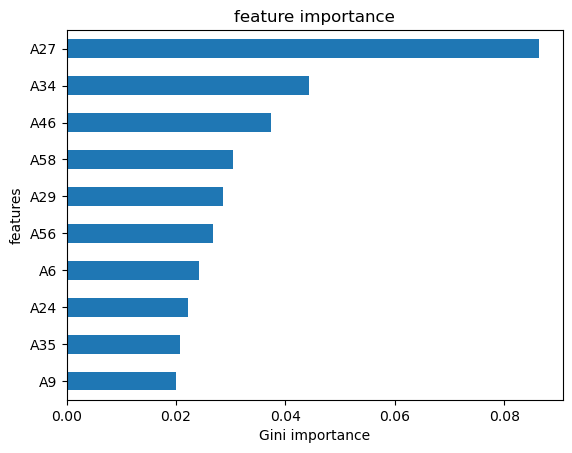

In [109]:
feat_imp.tail(10).plot(kind= 'barh')
plt.xlabel('Gini importance')
plt.ylabel('features')
plt.title('feature importance')
plt.show()

In [120]:
#SAve model

with open('model-5-3.pkl', 'wb') as f:
    model = pickle.dump(model, f)

In [2]:
def make_prediction(datafile, model_file):
    X_test = pd.read_csv(datafile)
    with open('model-5-3.pkl' , 'rb') as f:
        model = pickle.load(f)
    y_pred = model.predict(X_test)
    y_test_pred = pd.Series(y_pred, index = X_test.index ,name= 'bankrupt')
    return y_test_pred